# Generación de datos

In [1]:
import numpy as np
import pandas as pd

def pendulum_ode(t, y, g, L):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta)
    return np.array([dtheta_dt, domega_dt])

def rk4_step(f, t, y, dt, g, L):
    k1 = dt * f(t, y, g, L)
    k2 = dt * f(t + dt / 2, y + k1 / 2, g, L)
    k3 = dt * f(t + dt / 2, y + k2 / 2, g, L)
    k4 = dt * f(t + dt, y + k3, g, L)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def generate_pendulum_data(num_samples, t_max, dt, theta0, omega0):
    data = []

    L = 1 
    g = 9.8 

    t = 0
    y = np.array([theta0, omega0])

    while len(data) < num_samples:
        data.append([t, y[0]])
        y = rk4_step(pendulum_ode, t, y, dt, g, L)
        t += dt
        if t >= t_max:
            t = 0
            y = np.array([theta0, omega0])  # Reiniciar las condiciones iniciales

    return data

# Parámetros de simulación
num_samples = 30000
t_max = 10.0
dt = 0.01
theta0 = 0.1  # Ángulo inicial en radianes
omega0 = 0.0  # Velocidad angular inicial

# Generar los datos
data = generate_pendulum_data(num_samples, t_max, dt, theta0, omega0)

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data, columns=['time', 'theta'])

# Verificar los datos antes de estandarizar
print("Datos originales:")
print(df.head())

# Guardar los datos en un archivo CSV
df.to_csv('pendulum_data.csv', index=False)
print("Datos generados y guardados en 'pendulum_data.csv'")

Datos originales:
   time     theta
0  0.00  0.100000
1  0.01  0.099951
2  0.02  0.099804
3  0.03  0.099560
4  0.04  0.099218
Datos generados y guardados en 'pendulum_data.csv'


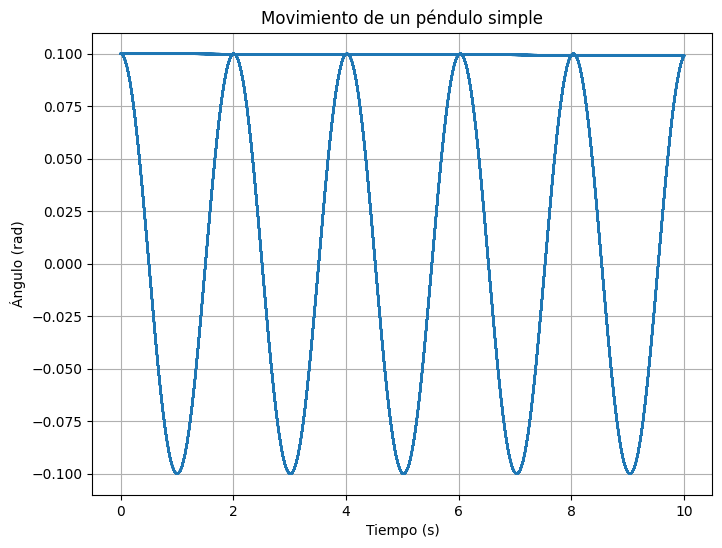

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
df = pd.read_csv('pendulum_data.csv')

# Graficar los resultados (sin filtrar para asegurar que se grafican datos)
plt.figure(figsize=(8, 6))
plt.plot(df['time'], df['theta'])
plt.title('Movimiento de un péndulo simple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.grid(True)
plt.show()

# Estandarización

In [3]:
from sklearn.preprocessing import StandardScaler

#Crear una copia de los datos
ds = df.copy()

#Escalar la data
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print("Todas las características estan estandarizadas")

# Guardar el DataFrame escalado en un archivo CSV
scaled_ds.to_csv('scaled_pendulum_data.csv', index=False)
print("Datos escalados guardados en 'scaled_pendulum_data.csv'")

Todas las características estan estandarizadas
Datos escalados guardados en 'scaled_pendulum_data.csv'


In [4]:
scaled_ds.head()

,time,theta
0,-1.730222,1.422249
1,-1.726758,1.421556
2,-1.723295,1.419478
3,-1.719831,1.416017
4,-1.716367,1.411176


# Red Neuronal


Modelo 1 - Config: {'layers': [64, 128], 'activations': ['relu', 'relu'], 'learning_rate': 0.001, 'epochs': 500, 'batch_size': 16}
Error cuadrático medio en el conjunto de entrenamiento: 0.010142363607883453
Error cuadrático medio en el conjunto de prueba: 0.009922808036208153


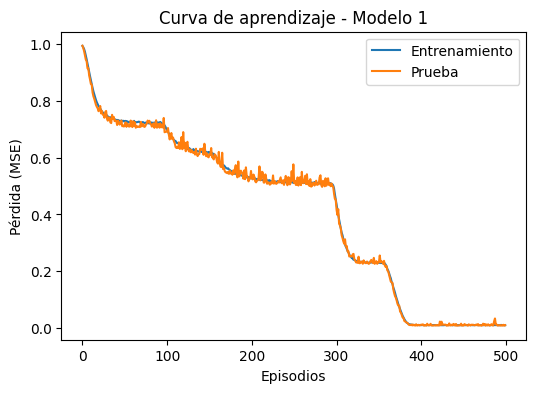


Modelo 2 - Config: {'layers': [64, 128, 64], 'activations': ['relu', 'relu', 'relu'], 'learning_rate': 0.001, 'epochs': 500, 'batch_size': 32}
Error cuadrático medio en el conjunto de entrenamiento: 0.0004569481243379414
Error cuadrático medio en el conjunto de prueba: 0.00045035668881610036


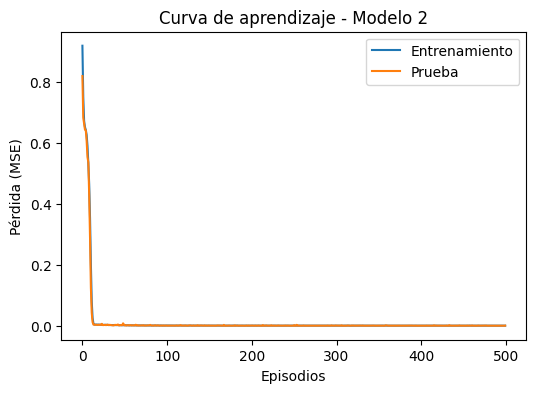


Modelo 3 - Config: {'layers': [64, 128], 'activations': ['tanh', 'tanh'], 'learning_rate': 0.001, 'epochs': 500, 'batch_size': 64}
Error cuadrático medio en el conjunto de entrenamiento: 0.9996703863143921
Error cuadrático medio en el conjunto de prueba: 1.0006930828094482


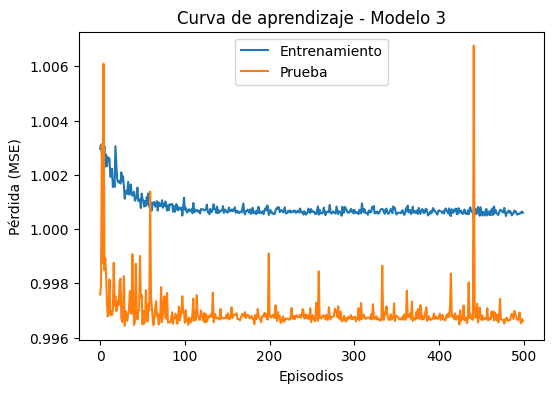


Modelo 4 - Config: {'layers': [64, 128, 64], 'activations': ['tanh', 'tanh', 'tanh'], 'learning_rate': 0.001, 'epochs': 500, 'batch_size': 32}
Error cuadrático medio en el conjunto de entrenamiento: 0.00014609929348807782
Error cuadrático medio en el conjunto de prueba: 0.00014209820074029267


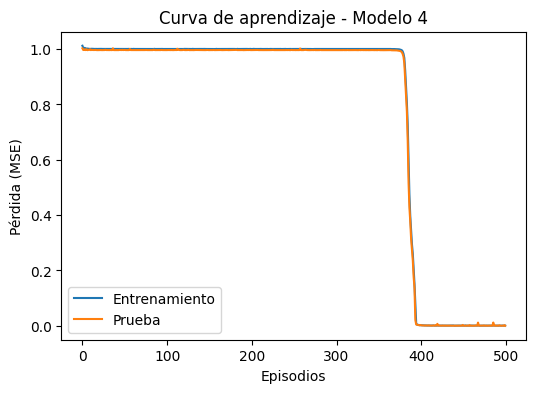


Modelo 5 - Config: {'layers': [64, 128], 'activations': ['relu', 'tanh'], 'learning_rate': 0.001, 'epochs': 500, 'batch_size': 32}
Error cuadrático medio en el conjunto de entrenamiento: 1.000303030014038
Error cuadrático medio en el conjunto de prueba: 1.0010851621627808


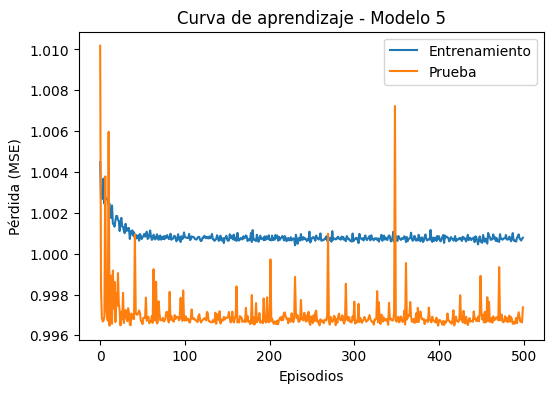


Modelo 6 - Config: {'layers': [64, 128, 64], 'activations': ['relu', 'tanh', 'relu'], 'learning_rate': 0.001, 'epochs': 500, 'batch_size': 16}
Error cuadrático medio en el conjunto de entrenamiento: 0.0021877195686101913
Error cuadrático medio en el conjunto de prueba: 0.0022715628147125244


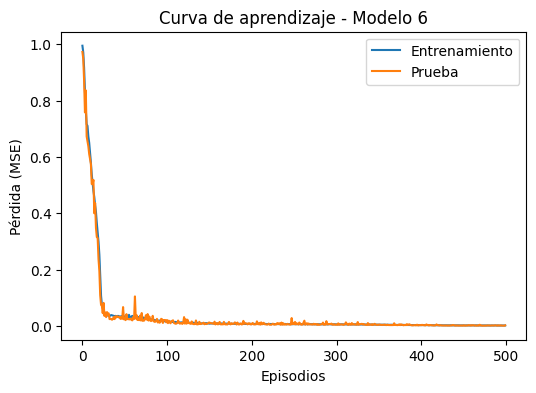


Modelo 7 - Config: {'layers': [64, 128], 'activations': ['tanh', 'relu'], 'learning_rate': 0.001, 'epochs': 500, 'batch_size': 64}
Error cuadrático medio en el conjunto de entrenamiento: 0.7531484365463257
Error cuadrático medio en el conjunto de prueba: 0.751600444316864


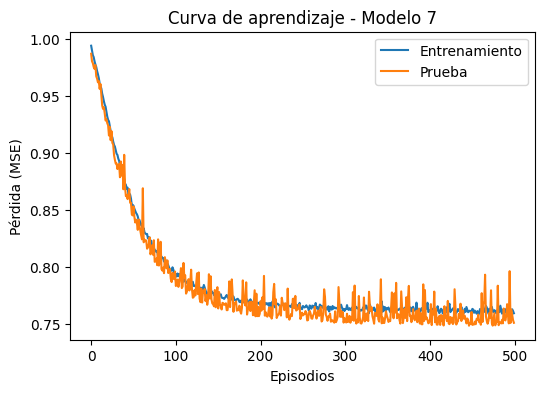


Modelo 8 - Config: {'layers': [64, 128, 64], 'activations': ['tanh', 'relu', 'tanh'], 'learning_rate': 0.01, 'epochs': 500, 'batch_size': 32}
Error cuadrático medio en el conjunto de entrenamiento: 1.001781702041626
Error cuadrático medio en el conjunto de prueba: 1.0019735097885132


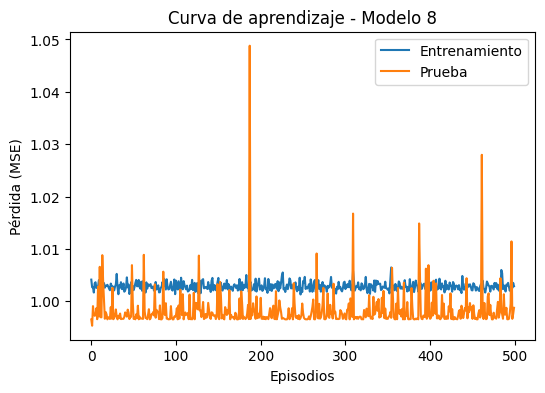


Modelo 1 - Config: {'layers': [64, 128], 'activations': ['relu', 'relu'], 'learning_rate': 0.001, 'epochs': 500, 'batch_size': 16}
Error cuadrático medio en el conjunto de entrenamiento: 0.010142363607883453
Error cuadrático medio en el conjunto de prueba: 0.009922808036208153

Modelo 2 - Config: {'layers': [64, 128, 64], 'activations': ['relu', 'relu', 'relu'], 'learning_rate': 0.001, 'epochs': 500, 'batch_size': 32}
Error cuadrático medio en el conjunto de entrenamiento: 0.0004569481243379414
Error cuadrático medio en el conjunto de prueba: 0.00045035668881610036

Modelo 3 - Config: {'layers': [64, 128], 'activations': ['tanh', 'tanh'], 'learning_rate': 0.001, 'epochs': 500, 'batch_size': 64}
Error cuadrático medio en el conjunto de entrenamiento: 0.9996703863143921
Error cuadrático medio en el conjunto de prueba: 1.0006930828094482

Modelo 4 - Config: {'layers': [64, 128, 64], 'activations': ['tanh', 'tanh', 'tanh'], 'learning_rate': 0.001, 'epochs': 500, 'batch_size': 32}
Error cu

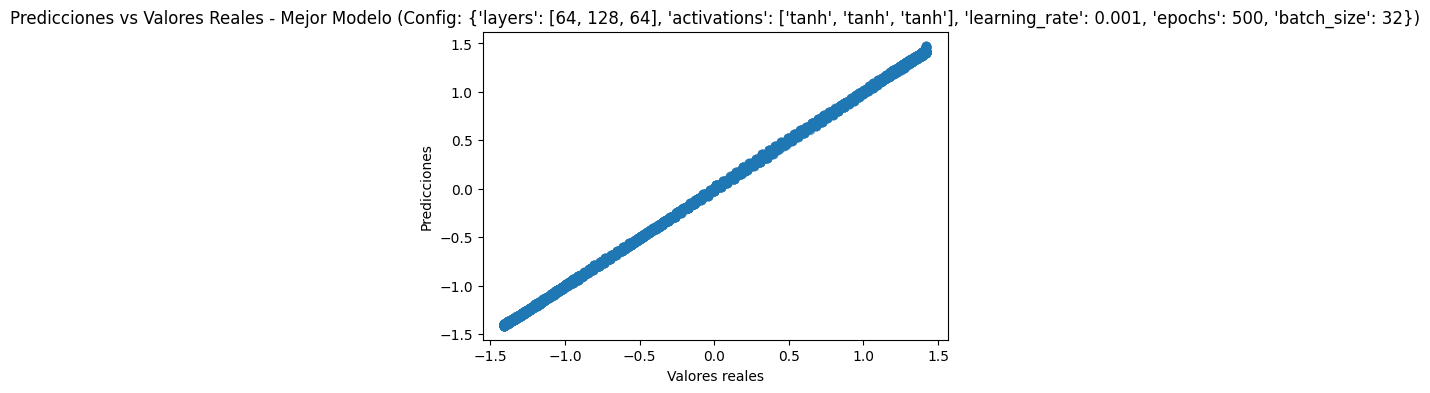

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar los datos escalados
scaled_ds = pd.read_csv('scaled_pendulum_data.csv')

# Separar las características (time) y la etiqueta (theta)
X = scaled_ds[['time']].values
y = scaled_ds['theta'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_and_train_model(layers, activations, learning_rate, epochs, batch_size):
    model = Sequential()
    model.add(tf.keras.layers.Input(shape=(1,)))  
    for units, activation in zip(layers[1:], activations[1:]):
        model.add(Dense(units, activation=activation))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=0)

    mse_train = model.evaluate(X_train, y_train, verbose=0)
    mse_test = model.evaluate(X_test, y_test, verbose=0)

    return model, history, mse_train, mse_test

# Configuración 1
config1 = {
    'layers': [64, 128],
    'activations': ['relu', 'relu'],
    'learning_rate': 0.001,
    'epochs': 500,
    'batch_size': 16
}

# Configuración 2
config2 = {
    'layers': [64, 128, 64],
    'activations': ['relu', 'relu', 'relu'],
    'learning_rate': 0.001,
    'epochs': 500,
    'batch_size': 32
}

# Configuración 3
config3 = {
    'layers': [64, 128],
    'activations': ['tanh', 'tanh'],
    'learning_rate': 0.001,
    'epochs': 500,
    'batch_size': 64
}

# Configuración 4
config4 = {
    'layers': [64, 128, 64],
    'activations': ['tanh', 'tanh', 'tanh'],
    'learning_rate': 0.001,
    'epochs': 500,
    'batch_size': 32
}

# Configuración 5
config5 = {
    'layers': [64, 128],
    'activations': ['relu', 'tanh'],
    'learning_rate': 0.001,
    'epochs': 500,
    'batch_size': 32
}

# Configuración 6
config6 = {
    'layers': [64, 128, 64],
    'activations': ['relu', 'tanh', 'relu'],
    'learning_rate': 0.001,
    'epochs': 500,
    'batch_size': 16
}

# Configuración 7
config7 = {
    'layers': [64, 128],
    'activations': ['tanh', 'relu'],
    'learning_rate': 0.001,
    'epochs': 500,
    'batch_size': 64
}

# Configuración 8
config8 = {
    'layers': [64, 128, 64],
    'activations': ['tanh', 'relu', 'tanh'],
    'learning_rate': 0.01,
    'epochs': 500,
    'batch_size': 32
}

# Entrenar y evaluar cada modelo
configs = [config1, config2, config3, config4, config5, config6, config7, config8]
results = []

for i, config in enumerate(configs):
    model, history, mse_train, mse_test = create_and_train_model(**config)
    results.append((model, history, mse_train, mse_test, config))

    # Imprimir resultados
    print(f"\nModelo {i+1} - Config: {config}")
    print(f"Error cuadrático medio en el conjunto de entrenamiento: {mse_train}")
    print(f"Error cuadrático medio en el conjunto de prueba: {mse_test}")

    # Graficar la curva de aprendizaje
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Prueba')
    plt.xlabel('Episodios')
    plt.ylabel('Pérdida (MSE)')
    plt.legend()
    plt.title(f'Curva de aprendizaje - Modelo {i+1}')
    plt.show()

# Comparar resultados
for i, (model, history, mse_train, mse_test, config) in enumerate(results):
    print(f"\nModelo {i+1} - Config: {config}")
    print(f"Error cuadrático medio en el conjunto de entrenamiento: {mse_train}")
    print(f"Error cuadrático medio en el conjunto de prueba: {mse_test}")

# Graficar las predicciones vs valores reales para el mejor modelo
best_model_index = np.argmin([mse_test for _, _, _, mse_test, _ in results])
best_model, best_history, _, _, best_config = results[best_model_index]

y_pred = best_model.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title(f'Predicciones vs Valores Reales - Mejor Modelo (Config: {best_config})')
plt.show()

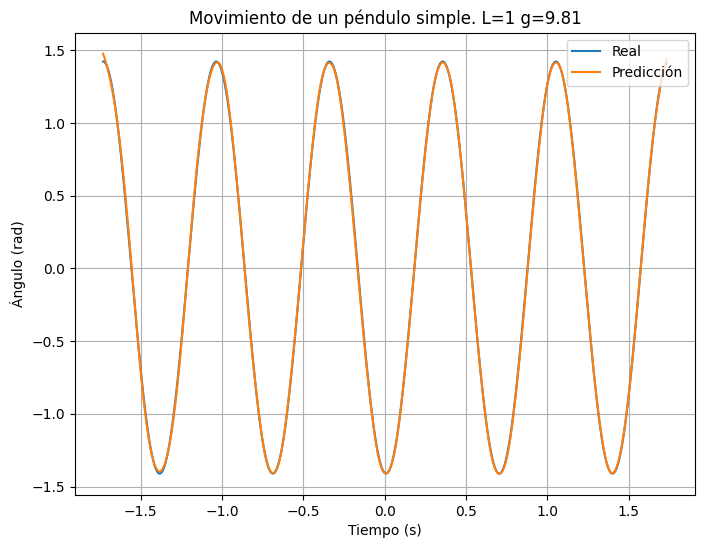

In [6]:
# Graficar las predicciones vs valores reales con alineación temporal
# Ordenar los datos por tiempo
sorted_indices = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sorted_indices]
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.figure(figsize=(8, 6))
plt.plot(X_test_sorted[:, 0], y_test_sorted, label='Real')
plt.plot(X_test_sorted[:, 0], y_pred_sorted, label='Predicción')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.title('Movimiento de un péndulo simple. L=1 g=9.81')
plt.grid(True)
plt.show()